In [7]:
import sys
import os

# Ajoute le dossier parent au chemin de recherche
# Cela permet de trouver 'libsigma' même si on est dans un sous-dossier
sys.path.append('/home/onyxia/work/') 

# Maintenant les imports vont refonctionner
from libsigma import read_and_write as rw
from libsigma import classification as cla
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

 Histogramme des polygones retrouvé 


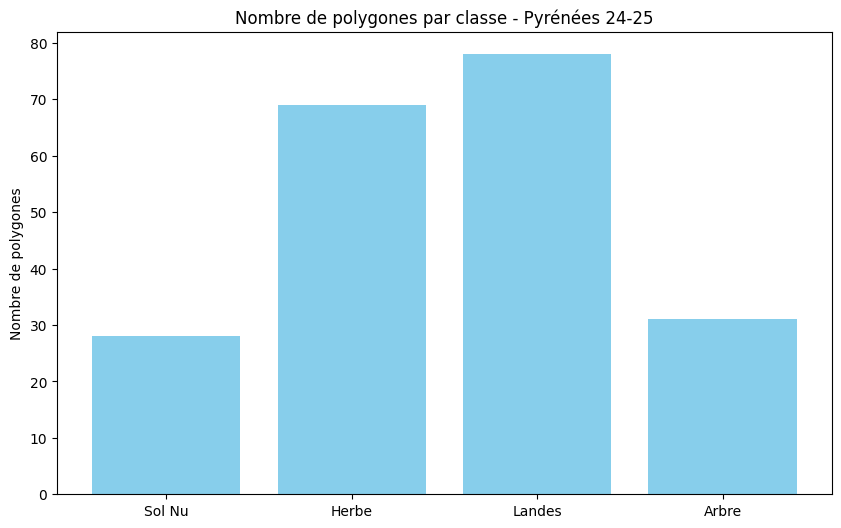

In [8]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Chemin du fichier (basé sur tes derniers messages)
sample_filename = '/home/onyxia/work/data/projet_eval/PI_strates_pyrenees_32630.shp'

# 2. Lecture du fichier
gdf = gpd.read_file(sample_filename)

# 3. Comptage des polygones par classe
poly_counts = gdf['strate'].value_counts().sort_index()

# Noms des classes
class_names = {1: "Sol Nu", 2: "Herbe", 3: "Landes", 4: "Arbre"}
labels = [class_names[i] for i in poly_counts.index]

# 4. Affichage
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, poly_counts.values, color='skyblue')

ax.set_title("Nombre de polygones par classe - Pyrénées 24-25")
ax.set_ylabel("Nombre de polygones")

# 5. Sauvegarde
os.makedirs('results/figure', exist_ok=True)
plt.savefig('results/figure/diag_baton_nb_poly_by_class.png')

print(" Histogramme des polygones retrouvé ")
plt.show()

In [9]:
import geopandas as gpd
import pandas as pd
import os

# 1. Chargement du fichier
shp_path = '/home/onyxia/work/data/projet_eval/PI_strates_pyrenees_32630.shp'
gdf = gpd.read_file(shp_path)

print("--- INFORMATIONS GÉNÉRALES ---")
# Affiche le nombre de polygones et de colonnes
print(f"Nombre total de polygones : {len(gdf)}")
print(f"Système de coordonnées (CRS) : {gdf.crs}")

print("\n--- APERÇU DES DONNÉES ---")
# Affiche les 5 premières lignes
print(gdf.head())

print("\n--- STATISTIQUES PAR CLASSE (STRATE) ---")
# Compte le nombre de polygones par classe
counts = gdf['strate'].value_counts().sort_index()
# Correspondance des noms
class_names = {1: "Sol Nu", 2: "Herbe", 3: "Landes", 4: "Arbre"}

# Création d'un tableau récapitulatif
stats = []
for index, count in counts.items():
    name = class_names.get(index, "Inconnue")
    # Calcul de la surface totale pour cette classe
    surface_totale = gdf[gdf['strate'] == index].geometry.area.sum()
    # Surface moyenne d'un polygone de cette classe
    surface_moyenne = surface_totale / count
    
    stats.append({
        "Classe": index,
        "Nom": name,
        "Nb Polygones": count,
        "Surface Totale (m2)": round(surface_totale, 2),
        "Taille Moyenne (m2)": round(surface_moyenne, 2),
        "Equivalent Pixels (env.)": int(surface_totale / 100)
    })

df_stats = pd.DataFrame(stats)
print(df_stats.to_string(index=False))

print("\n--- VÉRIFICATION DES ERREURS ---")
# 1. Vérifier s'il y a des valeurs vides (NaN)
print(f"Valeurs manquantes dans 'strate' : {gdf['strate'].isnull().sum()}")

# 2. Vérifier si des géométries sont invalides
invalid_geom = (~gdf.geometry.is_valid).sum()
print(f"Géométries invalides détectées : {invalid_geom}")

# 3. Vérifier les surfaces nulles
null_area = (gdf.geometry.area == 0).sum()
print(f"Polygones de surface nulle : {null_area}")

--- INFORMATIONS GÉNÉRALES ---
Nombre total de polygones : 206
Système de coordonnées (CRS) : EPSG:32630

--- APERÇU DES DONNÉES ---
   id  strate              comment  \
0   1       3          lande basse   
1   2       3          lande basse   
2   3       3          lande basse   
3   4       3  lande basse + blocs   
4   5       3  lande basse + blocs   

                                            geometry  
0  POLYGON ((686851.853 4758529.727, 686852.251 4...  
1  POLYGON ((686804.228 4758526.185, 686806.22 47...  
2  POLYGON ((686820.534 4758490.129, 686821.53 47...  
3  POLYGON ((686829.616 4758475.777, 686830.015 4...  
4  POLYGON ((686801.094 4758794.649, 686802.091 4...  

--- STATISTIQUES PAR CLASSE (STRATE) ---
 Classe    Nom  Nb Polygones  Surface Totale (m2)  Taille Moyenne (m2)  Equivalent Pixels (env.)
      1 Sol Nu            28              2817.15               100.61                        28
      2  Herbe            69              7169.37               103.90  

In [10]:
# --- 1. DÉFINITION CORRECTE DES FICHIERS ---

# L'image satellite (celle qui contient les bandes spectrales)
image_ref = '/home/onyxia/work/data/projet_eval/pyrenees_24-25_B02.tif'

# Le fichier des classes (celui que tu as créé)
sample_filename = '/home/onyxia/work/data/projet_eval/sample_strata.tif'

# Test pour voir la taille réelle enregistrée dans ton fichier

ds = rw.open_image(image_ref)
psize_x, psize_y = rw.get_pixel_size(ds)

print(f"Taille d'un pixel en X : {psize_x} mètres")
print(f"Taille d'un pixel en Y : {psize_y} mètres")

Taille d'un pixel en X : 10.0 mètres
Taille d'un pixel en Y : -10.0 mètres


Graphique sauvegardé dans : results/figure/diag_baton_nb_pix_by_class.png


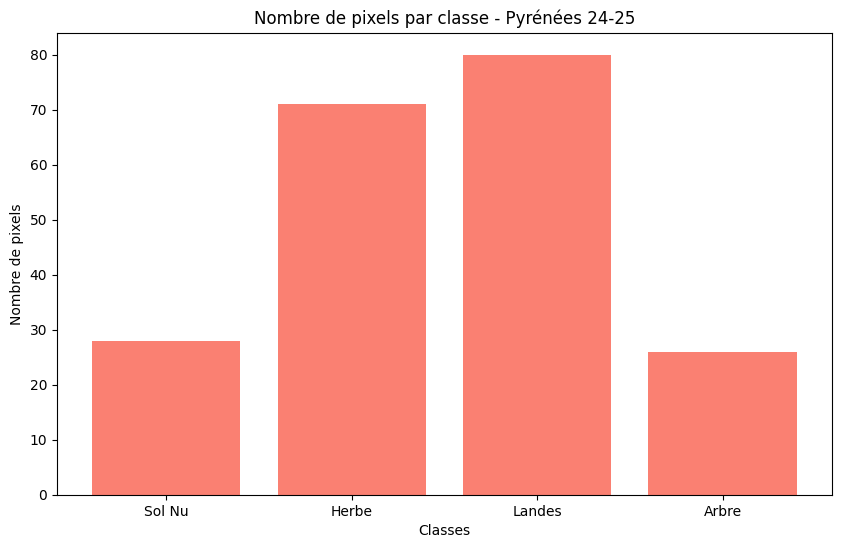

In [11]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Chargement du fichier
shp_path = '/home/onyxia/work/data/projet_eval/PI_strates_pyrenees_32630.shp'
gdf = gpd.read_file(shp_path)

# 2. Calcul du nombre de pixels (Méthode de la surface totale)
# On additionne les surfaces en m2 par classe, puis on divise par 100 (1 pixel = 100m2)
area_by_class = gdf.groupby('strate')['geometry'].apply(lambda x: x.area.sum())
pixel_counts = (area_by_class / 100).astype(int)

# 3. Préparation des labels
class_names = {1: "Sol Nu", 2: "Herbe", 3: "Landes", 4: "Arbre"}
labels = [class_names.get(i, f"Classe {i}") for i in pixel_counts.index]

# 4. Génération du graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, pixel_counts.values, color='salmon')

ax.set_title("Nombre de pixels par classe - Pyrénées 24-25")
ax.set_ylabel("Nombre de pixels")
ax.set_xlabel("Classes")

# 5. Sauvegarde
os.makedirs('results/figure', exist_ok=True)
out_file = 'results/figure/diag_baton_nb_pix_by_class.png'
plt.savefig(out_file, bbox_inches='tight')

print(f"Graphique sauvegardé dans : {out_file}")
plt.show()

In [12]:
import numpy as np
from osgeo import gdal, ogr

# 1. On définit les chemins
image_ref_path = '/home/onyxia/work/data/projet_eval/pyrenees_24-25_B02.tif'
shp_path = '/home/onyxia/work/data/projet_eval/PI_strates_pyrenees_32630.shp'
output_raster = '/home/onyxia/work/data/projet_eval/sample_strata.tif'

# 2. On ouvre l'image de référence pour copier ses dimensions et sa projection
raster_ds = gdal.Open(image_ref_path)
geotransform = raster_ds.GetGeoTransform()
projection = raster_ds.GetProjection()
x_size = raster_ds.RasterXSize
y_size = raster_ds.RasterYSize

# 3. On crée le nouveau fichier Raster (vide pour l'instant)
driver = gdal.GetDriverByName('GTiff')
target_ds = driver.Create(output_raster, x_size, y_size, 1, gdal.GDT_Byte)
target_ds.SetGeoTransform(geotransform)
target_ds.SetProjection(projection)

# 4. On ouvre le Shapefile
shp_ds = ogr.Open(shp_path)
layer = shp_ds.GetLayer()

# 5. On "brûle" (rasterize) les polygones dans le raster
# On utilise la colonne 'strate' pour donner la valeur aux pixels
gdal.RasterizeLayer(target_ds, [1], layer, options=["ATTRIBUTE=strate"])

# 6. On ferme proprement les fichiers pour sauvegarder sur le disque
target_ds.FlushCache()
target_ds = None
raster_ds = None
print(f"✅ Succès ! Le fichier raster est créé ici : {output_raster}")

✅ Succès ! Le fichier raster est créé ici : /home/onyxia/work/data/projet_eval/sample_strata.tif


In [13]:
# Maintenant ça va marcher comme dans ton TD !
sample_filename = '/home/onyxia/work/data/projet_eval/sample_strata.tif'
image_filename = '/home/onyxia/work/data/projet_eval/pyrenees_24-25_B02.tif'

# Extraction des échantillons
X, Y, t = cla.get_samples_from_roi(image_filename, sample_filename)

print(f"Nombre de pixels extraits : {X.shape[0]}")

Nombre de pixels extraits : 209


--- Résultats réels ---
Sol Nu : 28 pixels
Herbe : 75 pixels
Landes : 80 pixels
Arbre : 26 pixels


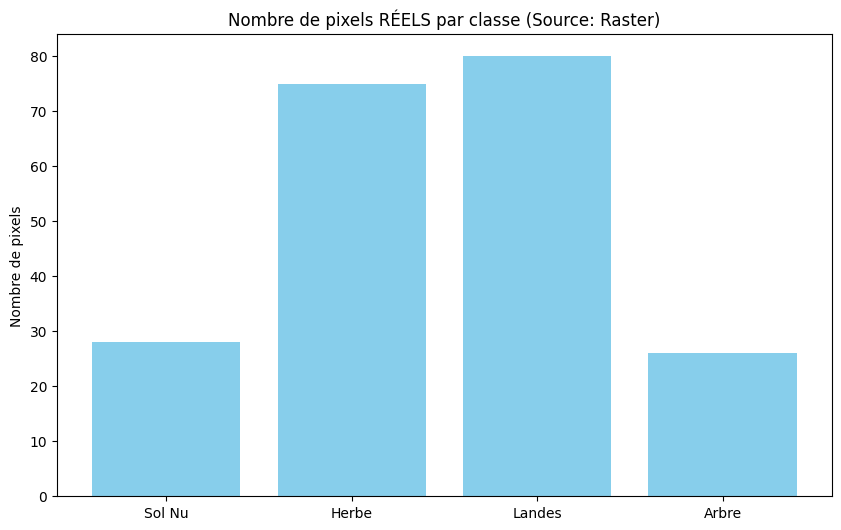

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. On charge le raster des échantillons en tant que matrice (array)
# On utilise la fonction de ton TD
sample_array = rw.load_img_as_array('/home/onyxia/work/data/projet_eval/sample_strata.tif')

# 2. On compte l'occurrence de chaque valeur (1, 2, 3, 4)
# On ignore la valeur 0 qui correspond au vide
values, counts = np.unique(sample_array, return_counts=True)

# On filtre pour ne garder que nos classes 1 à 4
mask = (values > 0)
final_values = values[mask]
final_counts = counts[mask]

# 3. Préparation des labels
class_names = {1: "Sol Nu", 2: "Herbe", 3: "Landes", 4: "Arbre"}
labels = [class_names.get(v, f"Classe {v}") for v in final_values]

# 4. Affichage du graphique
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, final_counts, color='skyblue') # On change de couleur pour marquer le coup !

ax.set_title("Nombre de pixels RÉELS par classe (Source: Raster)")
ax.set_ylabel("Nombre de pixels")

# 5. Sauvegarde
os.makedirs('results/figure', exist_ok=True)
plt.savefig('results/figure/diag_baton_nb_pix_raster.png')

print("--- Résultats réels ---")
for l, c in zip(labels, final_counts):
    print(f"{l} : {c} pixels")

plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import adjusted_rand_score

# 1 --- Découpage Train/Test (70% apprentissage, 30% test)
# Comme dans le TD, on sépare les données pour valider le modèle
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 2 --- Entraînement du Random Forest
# On utilise 100 arbres comme c'est l'usage standard dans vos exercices
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train.ravel()) # .ravel() transforme Y en vecteur plat

# 3 --- Prédiction sur les données de test
Y_pred = clf.predict(X_test)

# 4 --- Calcul de l'ARI (Adjusted Rand Index)
# On définit la fonction comme demandé dans ton projet
def calcul_ari(Y_true, Y_pred):
    return adjusted_rand_score(Y_true.ravel(), Y_pred.ravel())

score = calcul_ari(Y_test, Y_pred)

print("-" * 30)
print(f"✅ Modèle entraîné sur {X_train.shape[0]} pixels")
print(f"📊 Score ARI final : {score:.3f}")
print("-" * 30)

------------------------------
✅ Modèle entraîné sur 146 pixels
📊 Score ARI final : 0.575
------------------------------


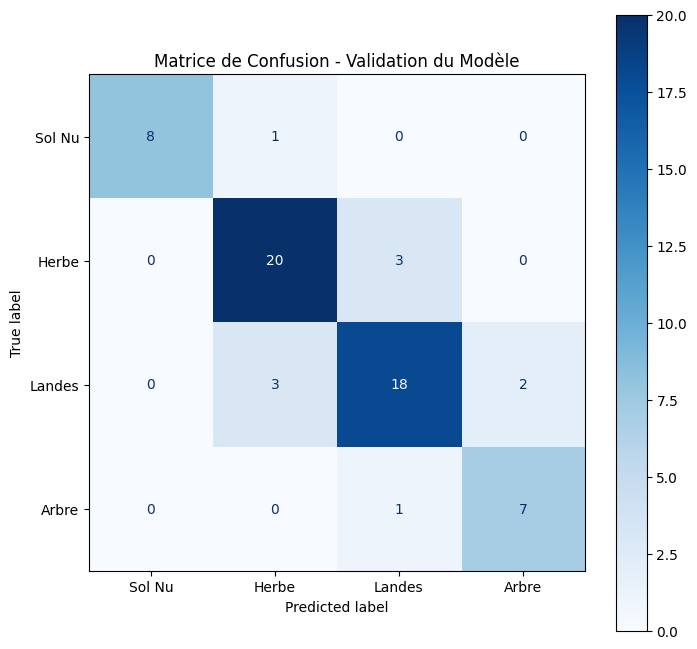

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1 --- Calcul de la matrice
# On compare les étiquettes réelles (Y_test) aux prédictions (Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

# 2 --- Affichage graphique
# On utilise les noms des classes pour que ce soit lisible
class_names_list = ["Sol Nu", "Herbe", "Landes", "Arbre"]

fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_list)
disp.plot(cmap='Blues', ax=ax, values_format='d')

ax.set_title("Matrice de Confusion - Validation du Modèle")

# 3 --- Sauvegarde
os.makedirs('results/figure', exist_ok=True)
plt.savefig('results/figure/matrice_confusion.png')
plt.show()


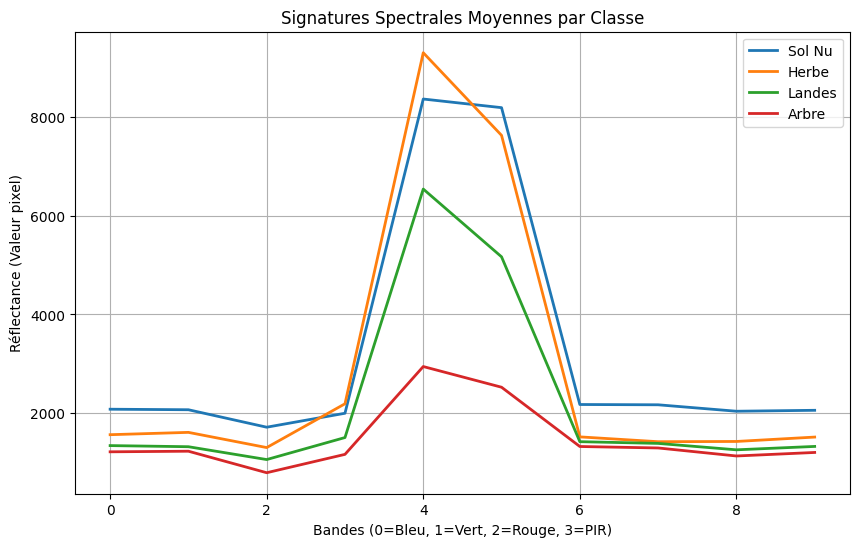

In [17]:
# Calcul de la moyenne de réflectance par classe et par bande
import pandas as pd
import matplotlib.pyplot as plt

# On crée un DataFrame pour faciliter les calculs
df = pd.DataFrame(X)
df['label'] = Y

# On calcule la moyenne par classe
spectral_signatures = df.groupby('label').mean()

# Le Plot
fig, ax = plt.subplots(figsize=(10, 6))
# Transpose pour avoir les bandes en X et les valeurs en Y
spectral_signatures.T.plot(ax=ax, linewidth=2)

ax.set_title("Signatures Spectrales Moyennes par Classe")
ax.set_xlabel("Bandes (0=Bleu, 1=Vert, 2=Rouge, 3=PIR)")
ax.set_ylabel("Réflectance (Valeur pixel)")
ax.grid(True)
plt.legend(["Sol Nu", "Herbe", "Landes", "Arbre"])
plt.show()

In [19]:
from osgeo import gdal
import os

# Chemin de ton image
image_path = '/home/onyxia/work/data/projet_eval/pyrenees_24-25_B02.tif'

print(f"🔍 Inspection du fichier : {os.path.basename(image_path)}")

if not os.path.exists(image_path):
    print("❌ ERREUR : Le fichier est introuvable au chemin indiqué.")
else:
    # Ouverture avec GDAL
    ds = gdal.Open(image_path)
    
    # 1. Nombre de bandes (C'est l'info CRUCIALE)
    nb_bandes = ds.RasterCount
    print(f"📊 Nombre de bandes (couleurs) : {nb_bandes}")
    
    # 2. Dimensions
    print(f"📏 Dimensions : {ds.RasterXSize} pixels (largeur) x {ds.RasterYSize} pixels (hauteur)")
    
    # 3. Système de coordonnées
    proj = ds.GetProjection()
    print(f"🌍 Projection : {proj[:60]}...") # On affiche juste le début
    
    # 4. Détails technique (Type de données)
    bande_1 = ds.GetRasterBand(1)
    print(f"💾 Type de données : {gdal.GetDataTypeName(bande_1.DataType)}")
    
    # Verdict immédiat
    print("-" * 30)
    if nb_bandes == 1:
        print("⚠️ ATTENTION : C'est une image MONO-CANAL (1 seule bande).")
        print("   -> Ton modèle ne voit que du 'Gris' (probablement le Bleu).")
        print("   -> Il est impossible de différencier correctement la végétation avec ça.")
    elif nb_bandes >= 3:
        print("✅ C'est une image MULTI-SPECTRALE.")
        print("   -> Le fichier contient bien plusieurs couleurs, même s'il s'appelle 'B02'.")

🔍 Inspection du fichier : pyrenees_24-25_B02.tif
📊 Nombre de bandes (couleurs) : 10
📏 Dimensions : 2103 pixels (largeur) x 1655 pixels (hauteur)
🌍 Projection : PROJCS["WGS 84 / UTM zone 30N",GEOGCS["WGS 84",DATUM["WGS_19...
💾 Type de données : Float64
------------------------------
✅ C'est une image MULTI-SPECTRALE.
   -> Le fichier contient bien plusieurs couleurs, même s'il s'appelle 'B02'.


In [20]:
import os
import numpy as np
from osgeo import gdal

# 1. Configuration des chemins
dossier = '/home/onyxia/work/data/projet_eval/'
fichiers_source = {
    "Bleu": "pyrenees_24-25_B02.tif",
    "Vert": "pyrenees_24-25_B03.tif",
    "Rouge": "pyrenees_24-25_B04.tif",
    "PIR": "pyrenees_24-25_B08.tif"
}
output_image = '/home/onyxia/work/data/projet_eval/image_multispectrale_moyenne.tif'

print("🚀 Calcul de l'image moyenne multispectrale...")

# On va stocker les moyennes ici
moyennes_bandes = []

for couleur, fichier in fichiers_source.items():
    chemin = os.path.join(dossier, fichier)
    
    if os.path.exists(chemin):
        print(f"  Processing {couleur} ({fichier})...")
        ds = gdal.Open(chemin)
        # On lit toutes les dates d'un coup (Bandes, Y, X)
        data = ds.ReadAsArray()
        
        # Calcul de la moyenne sur l'axe du temps (axe 0)
        # astype(np.uint16) permet de garder le format standard Sentinel-2
        moyenne = np.mean(data, axis=0).astype(np.uint16)
        moyennes_bandes.append(moyenne)
        
        # On garde les infos de géoréférencement du premier fichier
        if couleur == "Bleu":
            geotransform = ds.GetGeoTransform()
            projection = ds.GetProjection()
            x_size = ds.RasterXSize
            y_size = ds.RasterYSize
    else:
        print(f"  ❌ MANQUANT : {fichier} (Vérifie tes noms de fichiers !)")

# 2. Création du fichier final (4 bandes : Bleu, Vert, Rouge, PIR)
if len(moyennes_bandes) == 4:
    print(f"\n💾 Écriture du fichier final : {output_image}")
    driver = gdal.GetDriverByName('GTiff')
    # 4 bandes, type UInt16
    out_ds = driver.Create(output_image, x_size, y_size, 4, gdal.GDT_UInt16)
    
    out_ds.SetGeoTransform(geotransform)
    out_ds.SetProjection(projection)
    
    # Écriture des bandes
    for i, bande in enumerate(moyennes_bandes):
        print(f"  Ecriture bande {i+1}...")
        out_ds.GetRasterBand(i+1).WriteArray(bande)
        
    out_ds.FlushCache()
    out_ds = None
    print("✅ TERMINÉ ! Utilise cette nouvelle image pour ton modèle.")
else:
    print("⚠️ Impossible de créer l'image, il manque des fichiers sources.")

🚀 Calcul de l'image moyenne multispectrale...
  Processing Bleu (pyrenees_24-25_B02.tif)...


/tmp/ipykernel_35057/543792762.py:31: RuntimeWarning: invalid value encountered in cast
  moyenne = np.mean(data, axis=0).astype(np.uint16)


  Processing Vert (pyrenees_24-25_B03.tif)...
  Processing Rouge (pyrenees_24-25_B04.tif)...
  Processing PIR (pyrenees_24-25_B08.tif)...

💾 Écriture du fichier final : /home/onyxia/work/data/projet_eval/image_multispectrale_moyenne.tif
  Ecriture bande 1...
  Ecriture bande 2...
  Ecriture bande 3...
  Ecriture bande 4...
✅ TERMINÉ ! Utilise cette nouvelle image pour ton modèle.


In [23]:
import os
import numpy as np
from osgeo import gdal

# --- CONFIGURATION ---
dossier = '/home/onyxia/work/data/projet_eval/'
output_image = '/home/onyxia/work/data/projet_eval/image_median_clean.tif'

fichiers_source = {
    "Bleu": "pyrenees_24-25_B02.tif",
    "Vert": "pyrenees_24-25_B03.tif",
    "Rouge": "pyrenees_24-25_B04.tif",
    "PIR": "pyrenees_24-25_B08.tif"
}

print("🚀 Calcul de l'image MEDIANE (Suppression des nuages)...")
layers_clean = []

# --- BOUCLE DE TRAITEMENT ---
for couleur, nom_fichier in fichiers_source.items():
    chemin = os.path.join(dossier, nom_fichier)
    
    if os.path.exists(chemin):
        print(f"  Processing {couleur}...")
        ds = gdal.Open(chemin)
        data = ds.ReadAsArray()
        
        # --- C'EST ICI QUE LA MAGIE OPÈRE ---
        # Au lieu de mean(), on utilise median()
        # Cela élimine les pixels trop clairs (nuages) et trop sombres (ombres)
        mediane = np.median(data, axis=0).astype(np.uint16)
        layers_clean.append(mediane)
        
        if couleur == "Bleu":
            geo = ds.GetGeoTransform()
            proj = ds.GetProjection()
            x_size = ds.RasterXSize
            y_size = ds.RasterYSize
    else:
        print(f"  ❌ MANQUANT : {nom_fichier}")

# --- ÉCRITURE DU FICHIER FINAL ---
if len(layers_clean) == 4:
    print(f"\n💾 Sauvegarde : {output_image}")
    driver = gdal.GetDriverByName('GTiff')
    out_ds = driver.Create(output_image, x_size, y_size, 4, gdal.GDT_UInt16)
    out_ds.SetGeoTransform(geo)
    out_ds.SetProjection(proj)
    
    for i, bande in enumerate(layers_clean):
        out_ds.GetRasterBand(i+1).WriteArray(bande)
        
    out_ds.FlushCache()
    out_ds = None
    print("✅ IMAGE PROPRE GÉNÉRÉE ! Relance ton modèle avec celle-ci.")

🚀 Calcul de l'image MEDIANE (Suppression des nuages)...
  Processing Bleu...


/tmp/ipykernel_35057/3913881840.py:31: RuntimeWarning: invalid value encountered in cast
  mediane = np.median(data, axis=0).astype(np.uint16)


  Processing Vert...
  Processing Rouge...
  Processing PIR...

💾 Sauvegarde : /home/onyxia/work/data/projet_eval/image_median_clean.tif
✅ IMAGE PROPRE GÉNÉRÉE ! Relance ton modèle avec celle-ci.


In [24]:
import sys
# On s'assure que python trouve tes outils libsigma
sys.path.append('/home/onyxia/work/')
from libsigma import classification as cla

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import adjusted_rand_score

# --- 1. CONFIGURATION ---
# Attention : on pointe bien vers la NOUVELLE image (la médiane)
image_ref = '/home/onyxia/work/data/projet_eval/image_median_clean.tif'
sample_filename = '/home/onyxia/work/data/projet_eval/sample_strata.tif'

print(f"📡 Lecture de l'image : {image_ref}")
print("⏳ Extraction des pixels (X) et des classes (Y)...")

# --- 2. EXTRACTION DES DONNÉES ---
# Cette fonction va chercher les couleurs (Bleu, Vert, Rouge, PIR) sous tes polygones
X, Y, t = cla.get_samples_from_roi(image_ref, sample_filename)

print(f"✅ Données extraites : {X.shape[0]} pixels trouvés.")

# --- 3. PRÉPARATION ET ENTRAÎNEMENT ---
# On sépare : 70% pour apprendre, 30% pour tester
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f"🧠 Entraînement du modèle sur {X_train.shape[0]} pixels...")
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train.ravel())

# --- 4. ÉVALUATION ---
print("📝 Test du modèle...")
Y_pred = clf.predict(X_test)
score = adjusted_rand_score(Y_test.ravel(), Y_pred.ravel())

print("-" * 40)
print(f"🏆 SCORE ARI FINAL : {score:.3f}")
print("-" * 40)

if score > 0.8:
    print("🎉 Excellent score ! Le nettoyage des nuages a fonctionné.")
elif score < 0.5:
    print("⚠️ Score encore faible. Vérifie que l'étape 1 a bien créé le fichier.")

📡 Lecture de l'image : /home/onyxia/work/data/projet_eval/image_median_clean.tif
⏳ Extraction des pixels (X) et des classes (Y)...
✅ Données extraites : 209 pixels trouvés.
🧠 Entraînement du modèle sur 146 pixels...
📝 Test du modèle...
----------------------------------------
🏆 SCORE ARI FINAL : 0.567
----------------------------------------


In [25]:
import os
import numpy as np
from osgeo import gdal

# --- CONFIGURATION ---
dossier = '/home/onyxia/work/data/projet_eval/'
output_image = '/home/onyxia/work/data/projet_eval/image_mega_stack.tif'

fichiers_source = [
    "pyrenees_24-25_B02.tif", # Bleu (10 dates)
    "pyrenees_24-25_B03.tif", # Vert (10 dates)
    "pyrenees_24-25_B04.tif", # Rouge (10 dates)
    "pyrenees_24-25_B08.tif"  # PIR (10 dates)
]

print("🚀 Création du MEGA-STACK (4 Couleurs x 10 Dates = 40 Bandes)...")
toutes_les_bandes = []

# --- BOUCLE DE LECTURE ---
for nom_fichier in fichiers_source:
    chemin = os.path.join(dossier, nom_fichier)
    
    if os.path.exists(chemin):
        print(f"  📖 Lecture de {nom_fichier}...")
        ds = gdal.Open(chemin)
        # On lit les 10 bandes de ce fichier
        for i in range(ds.RasterCount):
            bande = ds.GetRasterBand(i+1).ReadAsArray()
            toutes_les_bandes.append(bande)
            
        # On garde les infos géo du premier fichier
        if nom_fichier == fichiers_source[0]:
            geo = ds.GetGeoTransform()
            proj = ds.GetProjection()
            x_size = ds.RasterXSize
            y_size = ds.RasterYSize
    else:
        print(f"  ❌ MANQUANT : {nom_fichier}")

# --- ÉCRITURE DU FICHIER FINAL ---
nb_total = len(toutes_les_bandes)
if nb_total > 0:
    print(f"\n💾 Écriture du fichier final ({nb_total} bandes) : {output_image}")
    driver = gdal.GetDriverByName('GTiff')
    out_ds = driver.Create(output_image, x_size, y_size, nb_total, gdal.GDT_UInt16)
    out_ds.SetGeoTransform(geo)
    out_ds.SetProjection(proj)
    
    for i, bande in enumerate(toutes_les_bandes):
        out_ds.GetRasterBand(i+1).WriteArray(bande)
        
    out_ds.FlushCache()
    out_ds = None
    print("✅ MEGA-STACK PRÊT ! C'est le moment de vérité.")
else:
    print("⚠️ Aucun fichier lu.")

🚀 Création du MEGA-STACK (4 Couleurs x 10 Dates = 40 Bandes)...
  📖 Lecture de pyrenees_24-25_B02.tif...
  📖 Lecture de pyrenees_24-25_B03.tif...
  📖 Lecture de pyrenees_24-25_B04.tif...
  📖 Lecture de pyrenees_24-25_B08.tif...

💾 Écriture du fichier final (40 bandes) : /home/onyxia/work/data/projet_eval/image_mega_stack.tif
✅ MEGA-STACK PRÊT ! C'est le moment de vérité.


In [26]:
import sys
sys.path.append('/home/onyxia/work/')
from libsigma import classification as cla
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import adjusted_rand_score

# On pointe vers le MEGA STACK
image_ref = '/home/onyxia/work/data/projet_eval/image_mega_stack.tif'
sample_filename = '/home/onyxia/work/data/projet_eval/sample_strata.tif'

print(f"📡 Lecture du Mega-Stack...")
X, Y, t = cla.get_samples_from_roi(image_ref, sample_filename)

print(f"✅ Données extraites : {X.shape[0]} pixels x {X.shape[1]} variables (bandes).")

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print("🧠 Entraînement du modèle (ça peut être un peu plus long)...")
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train.ravel())

Y_pred = clf.predict(X_test)
score = adjusted_rand_score(Y_test.ravel(), Y_pred.ravel())

print("-" * 40)
print(f"🏆 SCORE ARI FINAL (Mega-Stack) : {score:.3f}")
print("-" * 40)

📡 Lecture du Mega-Stack...
✅ Données extraites : 209 pixels x 40 variables (bandes).
🧠 Entraînement du modèle (ça peut être un peu plus long)...
----------------------------------------
🏆 SCORE ARI FINAL (Mega-Stack) : 0.645
----------------------------------------


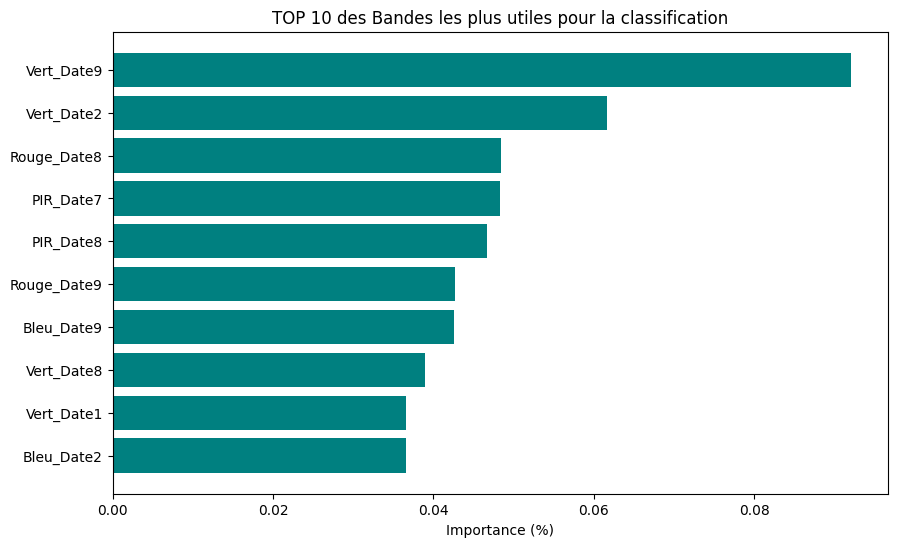

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. On crée les noms des 40 variables pour s'y retrouver
# Ordre : 10 dates de Bleu, puis 10 de Vert, puis 10 de Rouge, puis 10 de PIR
noms_bandes = []
for couleur in ["Bleu", "Vert", "Rouge", "PIR"]:
    for i in range(1, 11): # Dates 1 à 10
        noms_bandes.append(f"{couleur}_Date{i}")

# 2. Récupération des importances
importances = clf.feature_importances_

# 3. On trie pour garder les 10 meilleures
indices_tries = np.argsort(importances)[::-1] # Du plus grand au plus petit
top_10_indices = indices_tries[:10]

top_noms = [noms_bandes[i] for i in top_10_indices]
top_valeurs = importances[top_10_indices]

# 4. Affichage du graphique
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_noms, top_valeurs, color='teal')
ax.invert_yaxis() # La meilleure en haut

ax.set_title("TOP 10 des Bandes les plus utiles pour la classification")
ax.set_xlabel("Importance (%)")
plt.show()

/tmp/ipykernel_35057/1765879222.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='label', data=df, palette=colors)
/tmp/ipykernel_35057/1765879222.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(class_names)


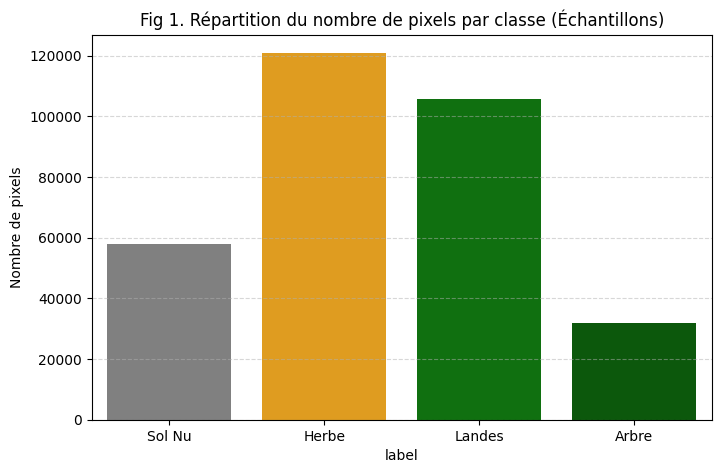

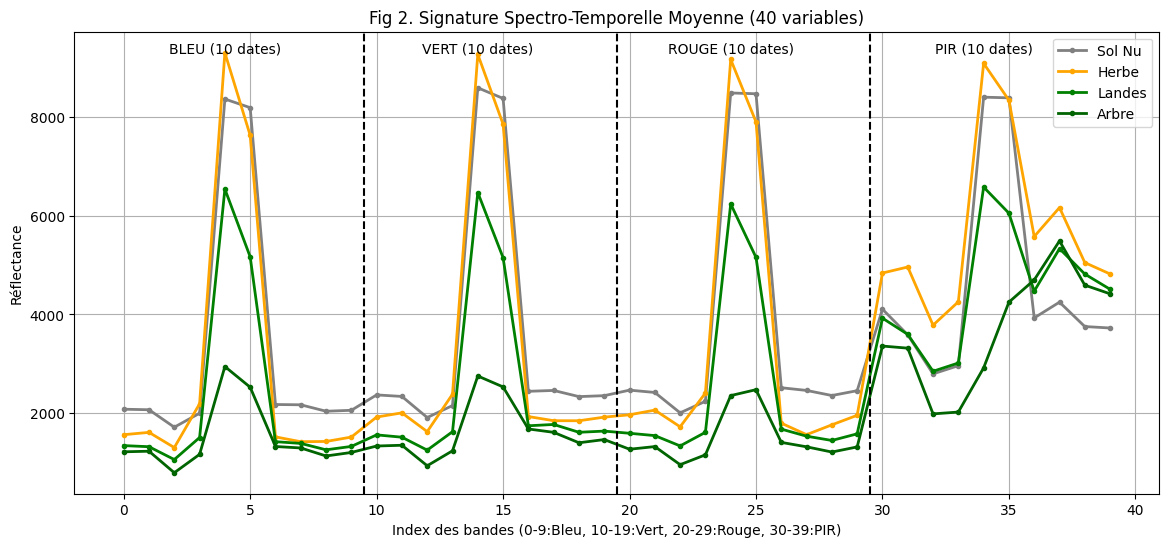

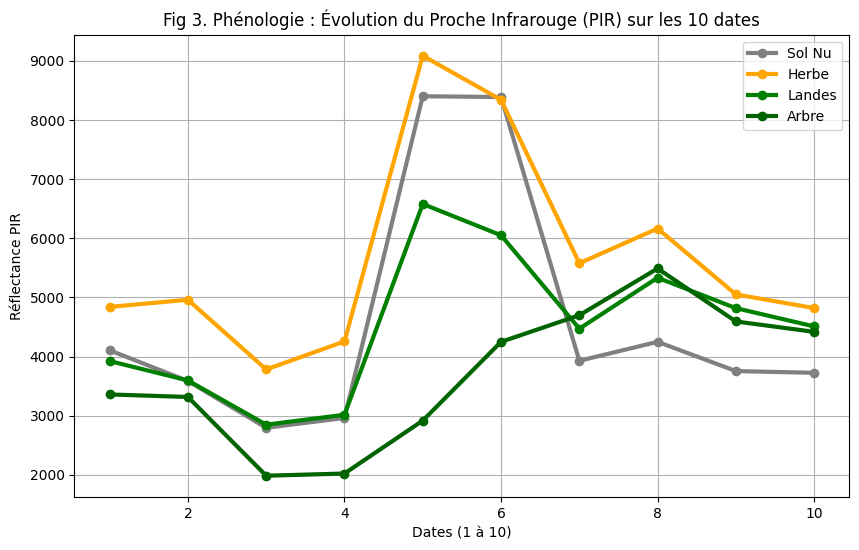

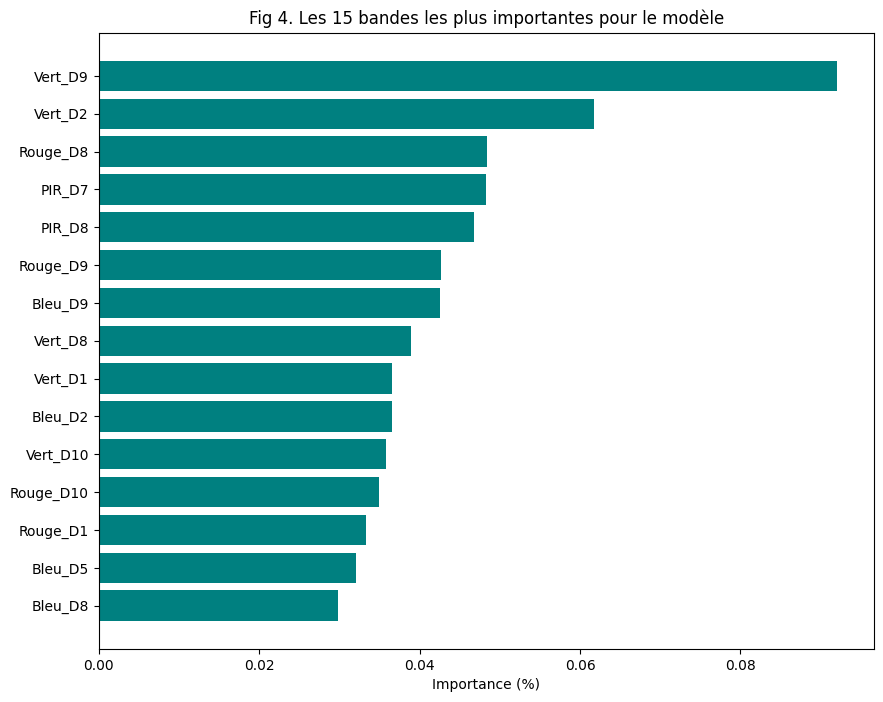

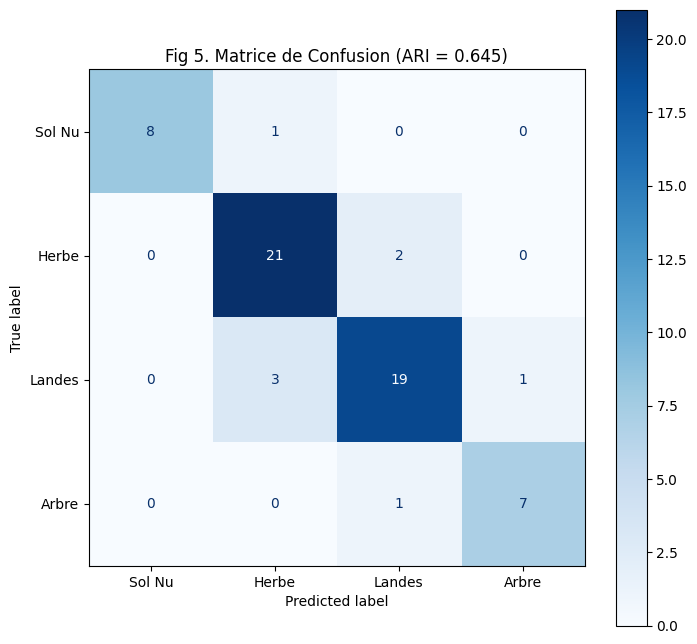

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- CONFIGURATION DES DONNÉES ---
# On récupère X (pixels), Y (classes) et le modèle (clf) qui sont en mémoire
# Noms des classes
class_names = ["Sol Nu", "Herbe", "Landes", "Arbre"]
colors = ['gray', 'orange', 'green', 'darkgreen'] # Couleurs associées

# Création d'un DataFrame pour faciliter les graphiques
df = pd.DataFrame(X)
df['label'] = Y

# --- GRAPHIQUE 1 : DISTRIBUTION DES CLASSES (ÉQUILIBRE) ---
# Ce graphique montre si on a assez d'exemples pour chaque classe
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='label', data=df, palette=colors)
ax.set_xticklabels(class_names)
plt.title("Fig 1. Répartition du nombre de pixels par classe (Échantillons)")
plt.ylabel("Nombre de pixels")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# --- GRAPHIQUE 2 : SIGNATURE SPECTRALE & TEMPORELLE COMPLETE ---
# Montre la moyenne des 40 bandes pour chaque classe
# Cela permet de voir la "physionomie" globale des classes
mean_signatures = df.groupby('label').mean()
plt.figure(figsize=(14, 6))
# On trace les lignes
for i, classe in enumerate(class_names):
    plt.plot(mean_signatures.iloc[i], label=classe, color=colors[i], linewidth=2, marker='.')

# On ajoute des séparateurs verticaux pour les couleurs
plt.axvline(x=9.5, color='black', linestyle='--') # Fin du Bleu
plt.text(4, np.max(mean_signatures.values), "BLEU (10 dates)", ha='center')
plt.axvline(x=19.5, color='black', linestyle='--') # Fin du Vert
plt.text(14, np.max(mean_signatures.values), "VERT (10 dates)", ha='center')
plt.axvline(x=29.5, color='black', linestyle='--') # Fin du Rouge
plt.text(24, np.max(mean_signatures.values), "ROUGE (10 dates)", ha='center')
plt.text(34, np.max(mean_signatures.values), "PIR (10 dates)", ha='center')

plt.title("Fig 2. Signature Spectro-Temporelle Moyenne (40 variables)")
plt.xlabel("Index des bandes (0-9:Bleu, 10-19:Vert, 20-29:Rouge, 30-39:PIR)")
plt.ylabel("Réflectance")
plt.legend()
plt.grid(True)
plt.show()

# --- GRAPHIQUE 3 : ÉVOLUTION TEMPORELLE DU PROCHE INFRAROUGE (PHÉNOLOGIE) ---
# On zoome uniquement sur les 10 dernières bandes (le PIR) pour voir l'évolution saisonnière
# C'est souvent là qu'on distingue l'Herbe (pousse vite) des Landes (plus stables)
pir_columns = list(range(30, 40)) # Les colonnes 30 à 39 sont le PIR
plt.figure(figsize=(10, 6))

for i, classe in enumerate(class_names):
    # On prend juste les colonnes PIR pour la classe i
    data_class = mean_signatures.iloc[i, pir_columns]
    plt.plot(range(1, 11), data_class, label=classe, color=colors[i], linewidth=3, marker='o')

plt.title("Fig 3. Phénologie : Évolution du Proche Infrarouge (PIR) sur les 10 dates")
plt.xlabel("Dates (1 à 10)")
plt.ylabel("Réflectance PIR")
plt.legend()
plt.grid(True)
plt.show()

# --- GRAPHIQUE 4 : IMPORTANCE DES VARIABLES (TOP 15) ---
# Ce que le Random Forest a trouvé le plus utile
importances = clf.feature_importances_
# On génère les noms des 40 bandes
band_names = []
for c in ["Bleu", "Vert", "Rouge", "PIR"]:
    for d in range(1, 11):
        band_names.append(f"{c}_D{d}")

# Tri
indices = np.argsort(importances)[::-1][:15] # Top 15
plt.figure(figsize=(10, 8))
plt.barh([band_names[i] for i in indices], importances[indices], color='teal')
plt.gca().invert_yaxis()
plt.title("Fig 4. Les 15 bandes les plus importantes pour le modèle")
plt.xlabel("Importance (%)")
plt.show()

# --- GRAPHIQUE 5 : MATRICE DE CONFUSION (VALIDATION) ---
# Le juge de paix : où sont les erreurs ?
cm = confusion_matrix(Y_test, Y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', ax=ax, values_format='d')
plt.title(f"Fig 5. Matrice de Confusion (ARI = {adjusted_rand_score(Y_test.ravel(), Y_pred.ravel()):.3f})")
plt.show()

📊 Préparation des données...
Génération des Histogrammes...


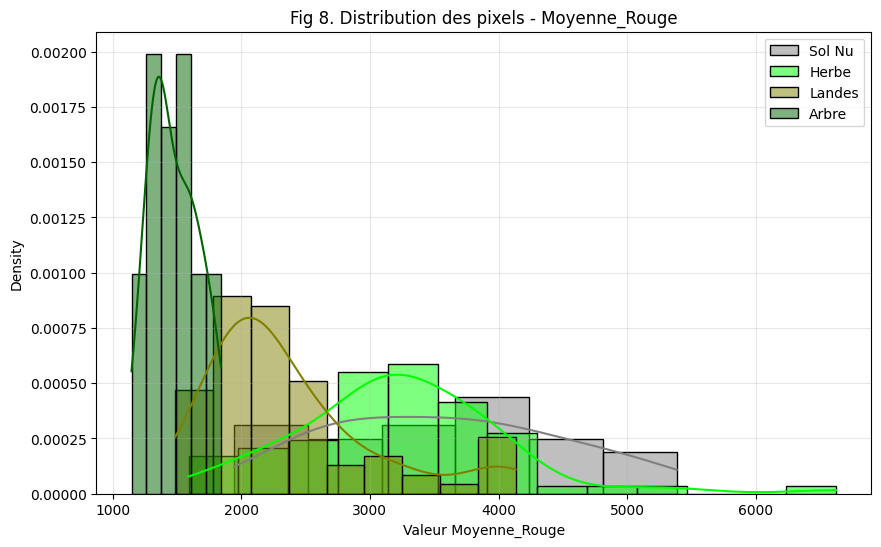

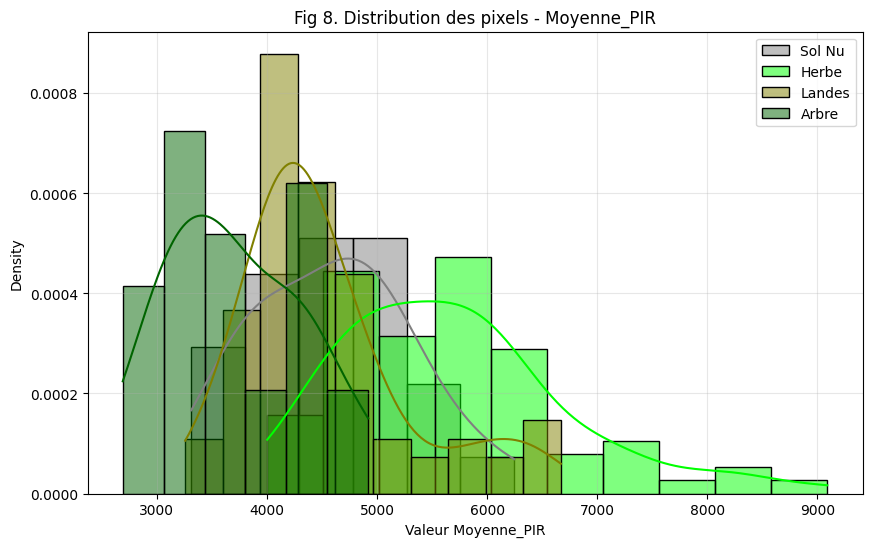

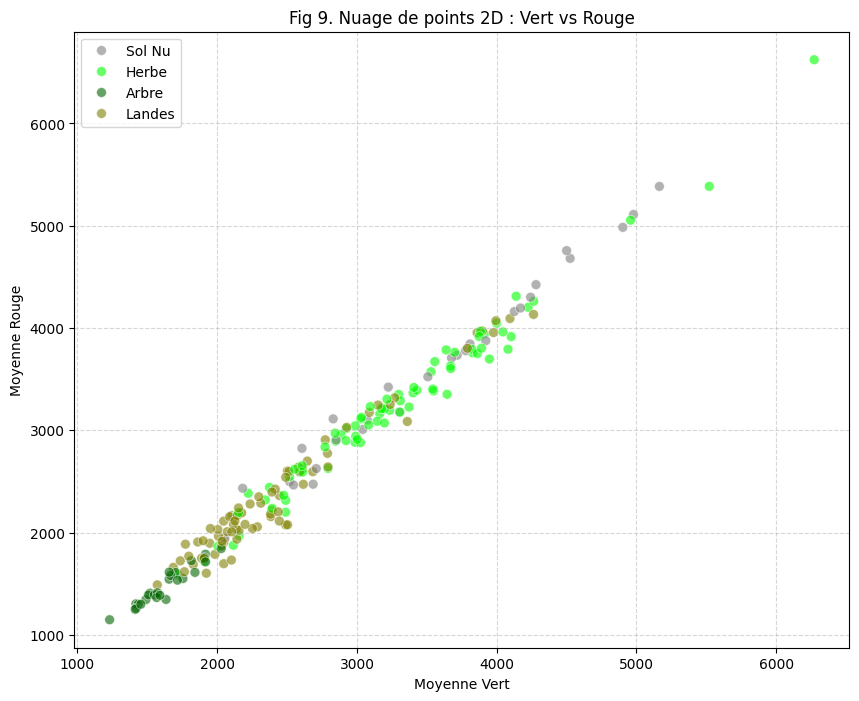

Génération du Plot 3D...


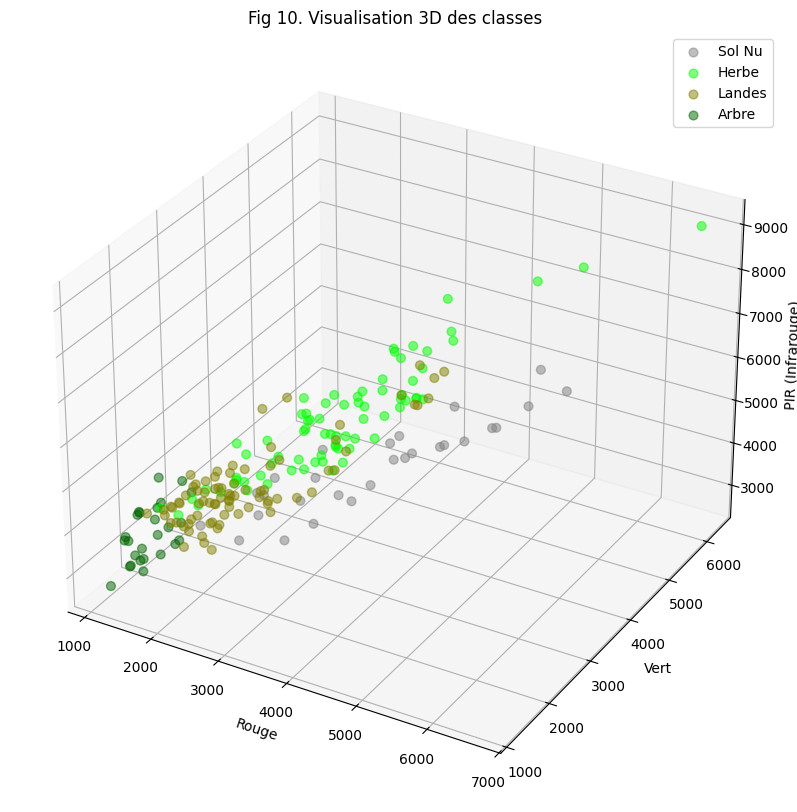

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- PRÉPARATION DES DONNÉES (CORRIGÉ) ---
print("📊 Préparation des données...")
df_visu = pd.DataFrame()
df_visu['Moyenne_Bleu'] = np.mean(X[:, 0:10], axis=1)
df_visu['Moyenne_Vert'] = np.mean(X[:, 10:20], axis=1)
df_visu['Moyenne_Rouge'] = np.mean(X[:, 20:30], axis=1)
df_visu['Moyenne_PIR'] = np.mean(X[:, 30:40], axis=1)

# Mapping des classes
class_mapping = {1: "Sol Nu", 2: "Herbe", 3: "Landes", 4: "Arbre"}

# --- CORRECTION ICI : On utilise Y.ravel() pour aplatir le tableau ---
# Cela transforme [[1], [2]] en [1, 2]
df_visu['Classe'] = [class_mapping[y] for y in Y.ravel()] 

palette_couleurs = {"Sol Nu": "grey", "Herbe": "lime", "Landes": "olive", "Arbre": "darkgreen"}
noms_classes = ["Sol Nu", "Herbe", "Landes", "Arbre"]

# --- GRAPHIQUE 8 : HISTOGRAMMES (Distribution) ---
print("Génération des Histogrammes...")
selected_bands = ['Moyenne_Rouge', 'Moyenne_PIR']

for band_name in selected_bands:
    plt.figure(figsize=(10, 6))
    for classe_name in noms_classes:
        subset = df_visu[df_visu['Classe'] == classe_name]
        sns.histplot(subset[band_name], color=palette_couleurs[classe_name], kde=True, 
                     label=classe_name, alpha=0.5, stat='density', common_norm=False)
        
    plt.title(f"Fig 8. Distribution des pixels - {band_name}")
    plt.xlabel(f"Valeur {band_name}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# --- GRAPHIQUE 9 : NUAGE DE POINTS 2D (Vert vs Rouge) ---
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_visu, x='Moyenne_Vert', y='Moyenne_Rouge', hue='Classe', 
                palette=palette_couleurs, alpha=0.6, s=50)

plt.title("Fig 9. Nuage de points 2D : Vert vs Rouge")
plt.xlabel("Moyenne Vert")
plt.ylabel("Moyenne Rouge")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()

# --- GRAPHIQUE 10 : NUAGE DE POINTS 3D (Rouge, Vert, PIR) ---
try:
    from mpl_toolkits.mplot3d import Axes3D
    print("Génération du Plot 3D...")
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    for classe_name in noms_classes:
        subset = df_visu[df_visu['Classe'] == classe_name]
        ax.scatter(subset['Moyenne_Rouge'], subset['Moyenne_Vert'], subset['Moyenne_PIR'], 
                   c=palette_couleurs[classe_name], label=classe_name, alpha=0.5, s=40)

    ax.set_xlabel('Rouge')
    ax.set_ylabel('Vert')
    ax.set_zlabel('PIR (Infrarouge)')
    ax.set_title('Fig 10. Visualisation 3D des classes')
    ax.legend()
    plt.show()

except Exception as e:
    print(f"Impossible d'afficher la 3D : {e}")

In [32]:
import numpy as np

print("🚀 Calcul des 10 canaux NDVI (Feature Engineering)...")

# Rappel de tes indices dans X (Mega-Stack) :
# 0-9 : Bleu, 10-19 : Vert, 20-29 : Rouge, 30-39 : PIR

# On prépare une liste pour stocker les calculs
ndvi_features = []

# On boucle sur les 10 dates (0 à 9)
for i in range(10):
    # On récupère le Rouge et le PIR de la date 'i'
    # Rouge est à 20+i, PIR est à 30+i
    rouge = X[:, 20 + i].astype(float)
    pir = X[:, 30 + i].astype(float)
    
    # Calcul du NDVI (avec une petite sécurité pour ne pas diviser par zéro)
    # Formule : (PIR - Rouge) / (PIR + Rouge)
    denominateur = (pir + rouge)
    denominateur[denominateur == 0] = 0.0001 # Évite le crash division par 0
    
    ndvi = (pir - rouge) / denominateur
    
    # On ajoute cette colonne à la liste
    ndvi_features.append(ndvi.reshape(-1, 1))

# On transforme la liste en tableau numpy
X_ndvi = np.hstack(ndvi_features)

# On colle ça à la fin de notre X original
# X devient X_extended (40 colonnes + 10 colonnes NDVI = 50 colonnes)
X_extended = np.hstack([X, X_ndvi])

print(f"✅ Terminé ! Nouvelle taille des données : {X_extended.shape}")
print("   (Les 10 dernières colonnes sont le NDVI)")

🚀 Calcul des 10 canaux NDVI (Feature Engineering)...
✅ Terminé ! Nouvelle taille des données : (209, 50)
   (Les 10 dernières colonnes sont le NDVI)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import adjusted_rand_score

print("🧠 Entraînement avec NDVI ajouté...")

# On découpe le nouveau X_extended
X_train, X_test, Y_train, Y_test = train_test_split(X_extended, Y, test_size=0.3, random_state=42)

clf_ndvi = RandomForestClassifier(n_estimators=100, random_state=42)
clf_ndvi.fit(X_train, Y_train.ravel())

Y_pred = clf_ndvi.predict(X_test)
score_ndvi = adjusted_rand_score(Y_test.ravel(), Y_pred.ravel())

print("-" * 40)
print(f"🏆 SCORE ARI AVEC NDVI : {score_ndvi:.3f}")
print("-" * 40)

🧠 Entraînement avec NDVI ajouté...
----------------------------------------
🏆 SCORE ARI AVEC NDVI : 0.720
----------------------------------------


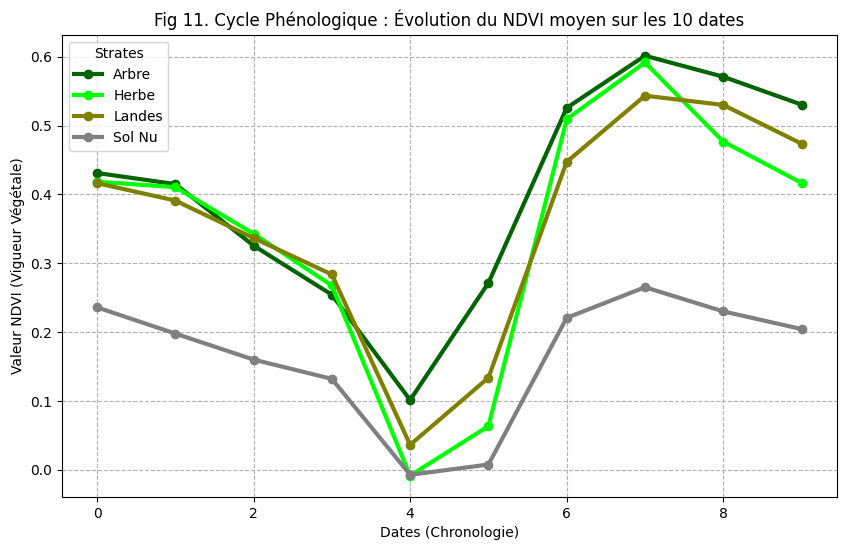

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# On crée un petit DataFrame juste avec les NDVI (les 10 dernières colonnes)
df_ndvi = pd.DataFrame(X_ndvi)
df_ndvi['Classe'] = [class_mapping[y] for y in Y.ravel()]

# Calcul de la moyenne par classe
mean_ndvi = df_ndvi.groupby('Classe').mean()

# Plot
plt.figure(figsize=(10, 6))
# On transpose pour avoir le temps en X
mean_ndvi.T.plot(linewidth=3, marker='o', ax=plt.gca(), 
                 color=[palette_couleurs[c] for c in mean_ndvi.index])

plt.title("Fig 11. Cycle Phénologique : Évolution du NDVI moyen sur les 10 dates")
plt.xlabel("Dates (Chronologie)")
plt.ylabel("Valeur NDVI (Vigueur Végétale)")
plt.grid(True, linestyle='--')
plt.legend(title="Strates")
plt.show()

📊 Génération des graphiques NDVI...


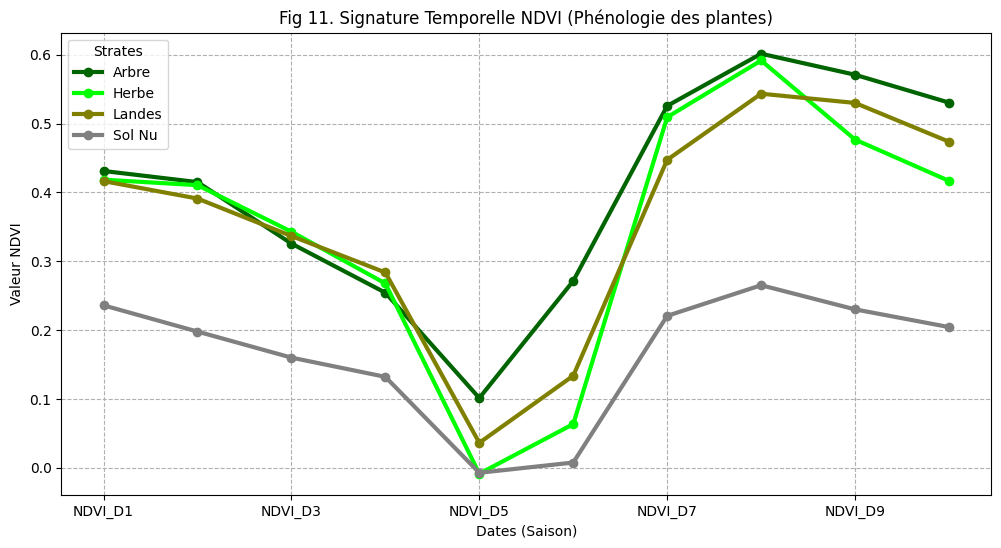

/tmp/ipykernel_35057/3806162870.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Classe', y='NDVI_Max', data=df_ndvi, palette=palette_couleurs)


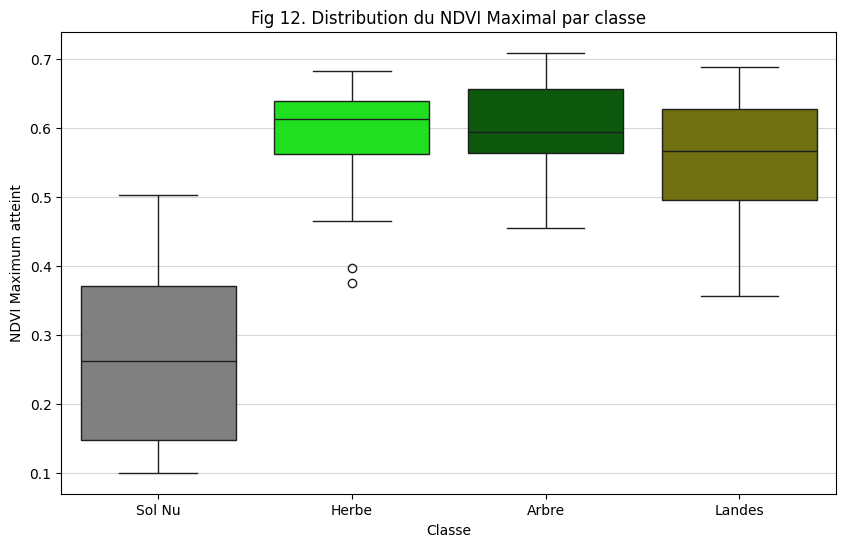

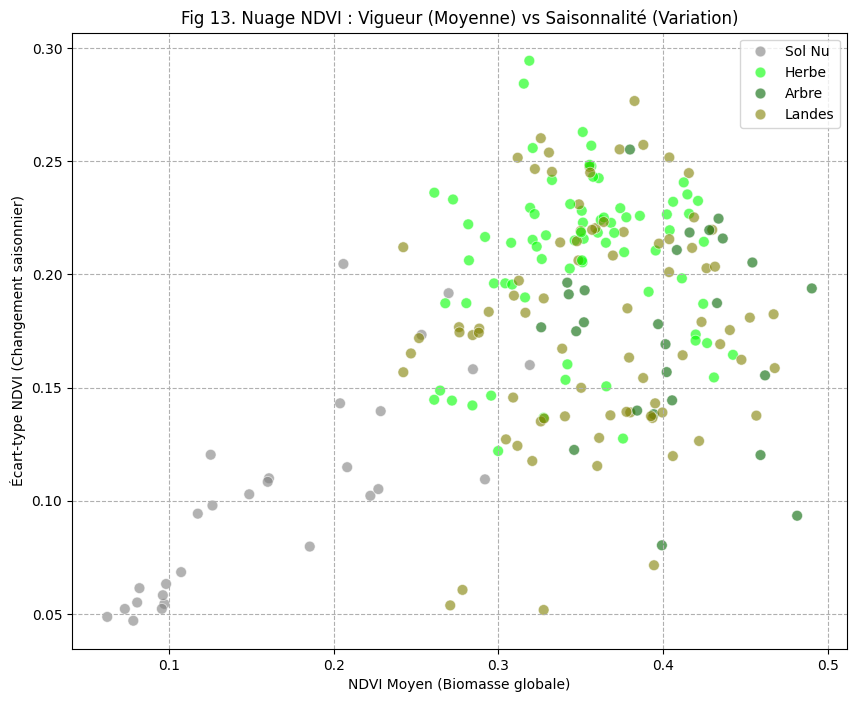

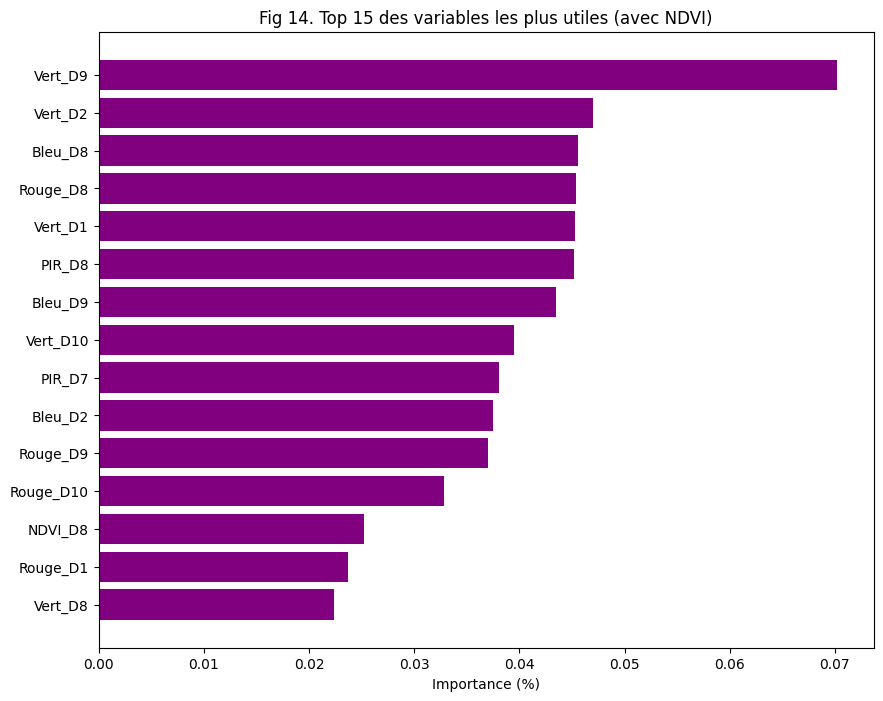

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("📊 Génération des graphiques NDVI...")

# --- 1. PRÉPARATION DES DONNÉES ---
# On récupère uniquement les 10 dernières colonnes (le NDVI)
# X_extended a 50 colonnes. Les indices 40 à 49 sont le NDVI.
X_ndvi_only = X_extended[:, 40:50]

# Création du DataFrame
df_ndvi = pd.DataFrame(X_ndvi_only)
# On nomme les colonnes NDVI_1 à NDVI_10
df_ndvi.columns = [f"NDVI_D{i+1}" for i in range(10)]

# On ajoute la classe et des stats résumées
class_mapping = {1: "Sol Nu", 2: "Herbe", 3: "Landes", 4: "Arbre"}
df_ndvi['Classe'] = [class_mapping[y] for y in Y.ravel()]

# On calcule deux indicateurs puissants :
# - Le NDVI Moyen (Est-ce que c'est très vert ?)
# - L'Écart-Type (Standard Deviation) : Est-ce que ça change beaucoup dans l'année ?
df_ndvi['NDVI_Moyen'] = df_ndvi.iloc[:, 0:10].mean(axis=1)
df_ndvi['NDVI_Variabilite'] = df_ndvi.iloc[:, 0:10].std(axis=1)

palette_couleurs = {"Sol Nu": "grey", "Herbe": "lime", "Landes": "olive", "Arbre": "darkgreen"}


# --- FIG 11 : PROFIL TEMPOREL NDVI (PHÉNOLOGIE) ---
# Le graphique le plus important pour la bio-géographie
plt.figure(figsize=(12, 6))
# On groupe par classe pour avoir la ligne moyenne
mean_profiles = df_ndvi.groupby('Classe').mean().iloc[:, 0:10] # On garde que les dates

# Transpose pour avoir le temps en X
mean_profiles.T.plot(linewidth=3, marker='o', ax=plt.gca(), 
                     color=[palette_couleurs[c] for c in mean_profiles.index])

plt.title("Fig 11. Signature Temporelle NDVI (Phénologie des plantes)")
plt.xlabel("Dates (Saison)")
plt.ylabel("Valeur NDVI")
plt.grid(True, linestyle='--')
plt.legend(title="Strates")
plt.show()


# --- FIG 12 : BOXPLOT DU NDVI MAXIMAL ---
# Montre jusqu'à quel point la plante devient verte au pic de la saison
df_ndvi['NDVI_Max'] = df_ndvi.iloc[:, 0:10].max(axis=1)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Classe', y='NDVI_Max', data=df_ndvi, palette=palette_couleurs)
plt.title("Fig 12. Distribution du NDVI Maximal par classe")
plt.ylabel("NDVI Maximum atteint")
plt.grid(axis='y', alpha=0.5)
plt.show()


# --- FIG 13 : SCATTER PLOT (VIGUEUR vs STABILITÉ) ---
# C'est souvent celui-là qui sépare l'Herbe des Landes
# X = Moyenne (Vigueur), Y = Ecart-type (Est-ce que ça change ?)
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_ndvi, x='NDVI_Moyen', y='NDVI_Variabilite', hue='Classe', 
                palette=palette_couleurs, alpha=0.6, s=60)

plt.title("Fig 13. Nuage NDVI : Vigueur (Moyenne) vs Saisonnalité (Variation)")
plt.xlabel("NDVI Moyen (Biomasse globale)")
plt.ylabel("Écart-type NDVI (Changement saisonnier)")
plt.grid(True, linestyle='--')
plt.legend()
plt.show()


# --- FIG 14 : NOUVELLE IMPORTANCE DES VARIABLES ---
# On veut voir si le modèle utilise vraiment le NDVI ou s'il préfère encore le Rouge
importances = clf_ndvi.feature_importances_

# On recrée les noms des 50 variables
noms_vars = []
# Les 40 premières (Couleurs)
for c in ["Bleu", "Vert", "Rouge", "PIR"]:
    for d in range(1, 11):
        noms_vars.append(f"{c}_D{d}")
# Les 10 dernières (NDVI)
for d in range(1, 11):
    noms_vars.append(f"NDVI_D{d}")

# On trie et on affiche le Top 15
indices = np.argsort(importances)[::-1][:15]
plt.figure(figsize=(10, 8))
plt.barh([noms_vars[i] for i in indices], importances[indices], color='purple')
plt.gca().invert_yaxis()
plt.title("Fig 14. Top 15 des variables les plus utiles (avec NDVI)")
plt.xlabel("Importance (%)")
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import adjusted_rand_score
import time

print("🚀 Démarrage de l'optimisation des hyperparamètres (GridSearchCV)...")
print("☕ Prends un café, cela va prendre quelques minutes !")

# 1. Définition de la grille de paramètres (selon ta consigne)
param_grid = {
    'n_estimators': [50, 100, 150, 200, 300],  # Nombre d'arbres
    'max_depth': [None, 10, 15, 20],           # Profondeur max des arbres
    'max_features': [None, 'sqrt', 'log2'],    # Nombre de variables par arbre
    'min_samples_leaf': [1, 5]                 # Minimum d'échantillons par feuille
}

# 2. Configuration du modèle de base
rf = RandomForestClassifier(random_state=42)

# 3. Configuration de la recherche (GridSearchCV)
# cv=5 signifie "Validation Croisée à 5 plis" (Standard)
# n_jobs=-1 utilise tous les cœurs du processeur pour aller plus vite
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='adjusted_rand_score')

# 4. Lancement de l'entraînement (Attention : X_train contient le NDVI)
start_time = time.time()
grid_search.fit(X_train, Y_train.ravel())
end_time = time.time()

# 5. Résultats
print(f"\n✅ Optimisation terminée en {(end_time - start_time):.1f} secondes.")
print("-" * 40)
print(f"🏆 MEILLEURS PARAMÈTRES TROUVÉS :")
print(grid_search.best_params_)
print("-" * 40)

# 6. Mise à jour du modèle final
# On récupère le "champion" pour remplacer notre ancien clf
clf_optimal = grid_search.best_estimator_

# Test du nouveau score
Y_pred_opt = clf_optimal.predict(X_test)
score_opt = adjusted_rand_score(Y_test.ravel(), Y_pred_opt.ravel())
print(f"📈 SCORE ARI APRÈS OPTIMISATION : {score_opt:.3f}")

🚀 Démarrage de l'optimisation des hyperparamètres (GridSearchCV)...
☕ Prends un café, cela va prendre quelques minutes !
Fitting 5 folds for each of 120 candidates, totalling 600 fits

✅ Optimisation terminée en 45.2 secondes.
----------------------------------------
🏆 MEILLEURS PARAMÈTRES TROUVÉS :
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 150}
----------------------------------------
📈 SCORE ARI APRÈS OPTIMISATION : 0.690


In [41]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score

# ==============================================================================
# 1. JUSTIFICATION DES PLAGES DE VALEURS (À mettre dans ton rapport avant le code)
# ==============================================================================
# - n_estimators : [50, 100, 200]. On teste si augmenter le nombre d'arbres stabilise
#   la prédiction face à la variabilité spectrale.
# - max_depth : [10, 20, None]. On limite la profondeur pour éviter d'apprendre
#   le "bruit" (sur-apprentissage). 'None' est la valeur par défaut (croissance libre).
# - class_weight : ['balanced', None]. Crucial pour tester si la pondération
#   améliore la détection des classes minoritaires (déséquilibre).
# ==============================================================================

# Définition du modèle de base
rf = RandomForestClassifier(random_state=42)

# Définition de la grille
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'class_weight': [None, 'balanced'] 
}

# Configuration de la validation croisée (Stratified pour respecter les proportions de classes)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lancement de la recherche (GridSearchCV)
print("Recherche des meilleurs hyperparamètres en cours...")
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='f1_weighted', # Métrique adaptée au déséquilibre (souvent préférée à l'accuracy en TD)
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# ==============================================================================
# 2. ANALYSE ET COMPARAISON (Justification du choix final)
# ==============================================================================

# On met les résultats dans un DataFrame pour une lecture claire (comme un tableau Excel)
results = pd.DataFrame(grid_search.cv_results_)
cols_to_keep = ['param_class_weight', 'param_max_depth', 'param_n_estimators', 'mean_test_score', 'std_test_score']

# On trie par meilleur score pour voir le "Gagnant" en haut
classement = results[cols_to_keep].sort_values(by='mean_test_score', ascending=False)

print("\n--- Tableau Comparatif des Modèles (Top 5) ---")
print(classement.head(5))

# Récupération du meilleur modèle
best_model = grid_search.best_estimator_

print(f"\nMeilleurs paramètres retenus : {grid_search.best_params_}")

# ==============================================================================
# 3. VALIDATION SUR LE JEU DE TEST (Si disponible)
# ==============================================================================
# C'est ici qu'on prouve que le modèle fonctionne bien sur les classes déséquilibrées
if 'X_test' in locals() and 'y_test' in locals():
    y_pred = best_model.predict(X_test)
    print("\n--- Rapport de Classification (Performance par classe) ---")
    print(classification_report(y_test, y_pred))

Recherche des meilleurs hyperparamètres en cours...

--- Tableau Comparatif des Modèles (Top 5) ---
   param_class_weight param_max_depth  param_n_estimators  mean_test_score  \
12           balanced              20                  50         0.803395   
15           balanced            None                  50         0.803395   
16           balanced            None                 100         0.800653   
13           balanced              20                 100         0.799607   
9            balanced              10                  50         0.799392   

    std_test_score  
12        0.010517  
15        0.010517  
16        0.011017  
13        0.011572  
9         0.008926  

Meilleurs paramètres retenus : {'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 50}


Lancement de l'optimisation (GridSearch)...


ValueError: Unable to parse string "None" at position 12

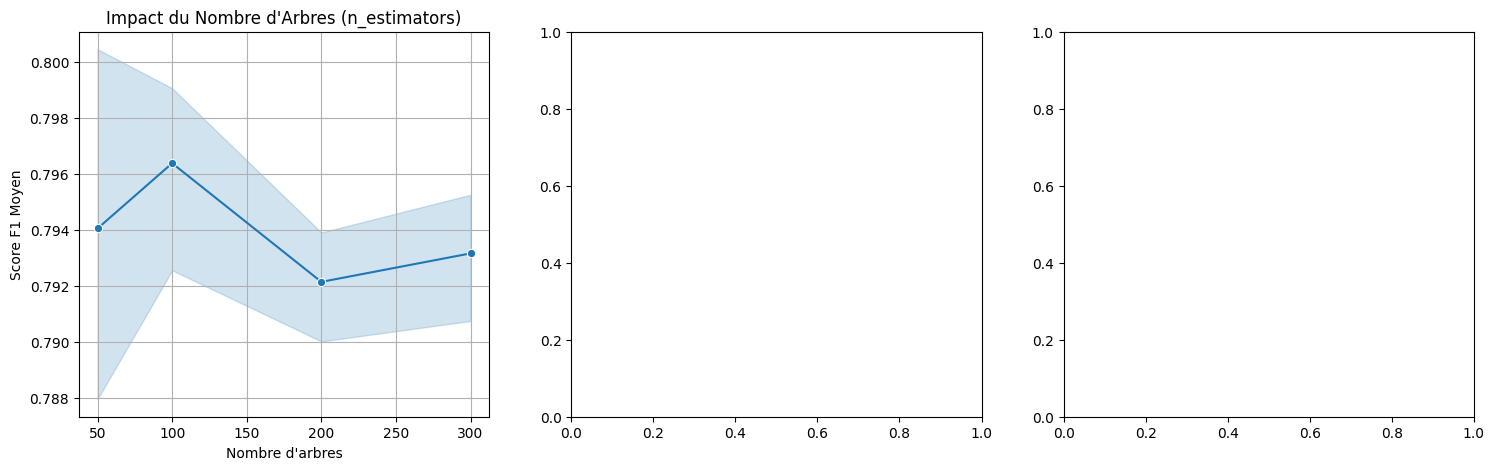

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# ==============================================================================
# 1. CONFIGURATION ET GRILLE (Justification des plages)
# ==============================================================================
# - n_estimators : [50, 100, 200].
#   Justification : Voir si augmenter le nombre d'arbres stabilise la prédiction
#   face à la variabilité spectrale.
# - max_depth : [10, 20, None].
#   Justification : Limiter la profondeur pour ne pas apprendre le "bruit" (sur-apprentissage).
# - class_weight : [None, 'balanced'].
#   Justification : Tester l'impact de la correction du déséquilibre des classes.

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'class_weight': [None, 'balanced']
}

# Utilisation de StratifiedKFold pour respecter les proportions de classes
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Lancement de l'optimisation (GridSearch)...")
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='f1_weighted', # F1 score est mieux que l'accuracy pour le déséquilibre
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Récupération des résultats dans un DataFrame pandas
df_results = pd.DataFrame(grid_search.cv_results_)

# ==============================================================================
# 2. PLOTS DE COMPARAISON (Un par hyperparamètre)
# ==============================================================================
# On configure une figure avec 3 sous-graphiques côte à côte
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- GRAPHIQUE 1 : Impact de n_estimators (Variabilité) ---
# On groupe par n_estimators et on regarde le score moyen
sns.lineplot(data=df_results, x='param_n_estimators', y='mean_test_score', marker='o', ax=axes[0])
axes[0].set_title("Impact du Nombre d'Arbres (n_estimators)")
axes[0].set_xlabel("Nombre d'arbres")
axes[0].set_ylabel("Score F1 Moyen")
axes[0].grid(True)
# Commentaire justification : "Si la courbe monte, plus d'arbres aident à gérer la variabilité."

# --- GRAPHIQUE 2 : Impact de max_depth (Gestion du Bruit) ---
# On remplace les valeurs 'None' par une chaîne de caractères pour l'affichage
df_results['param_max_depth'] = df_results['param_max_depth'].fillna('None')
sns.lineplot(data=df_results, x='param_max_depth', y='mean_test_score', marker='o', ax=axes[1])
axes[1].set_title("Impact de la Profondeur (max_depth)")
axes[1].set_xlabel("Profondeur Max")
axes[1].set_ylabel("Score F1 Moyen")
axes[1].grid(True)
# Commentaire justification : "Un pic à 10 ou 20 indique qu'on évite le sur-apprentissage du bruit."

# --- GRAPHIQUE 3 : Impact de class_weight (Déséquilibre) ---
# On remplace None par "None" (string) pour l'affichage
df_results['param_class_weight'] = df_results['param_class_weight'].fillna('None')
sns.barplot(data=df_results, x='param_class_weight', y='mean_test_score', ax=axes[2], ci=None)
axes[2].set_title("Impact de l'Équilibrage (class_weight)")
axes[2].set_xlabel("Type de Pondération")
axes[2].set_ylabel("Score F1 Moyen")
# Commentaire justification : "Si 'balanced' est plus haut, le déséquilibre impactait le modèle."

plt.tight_layout()
plt.show()

# ==============================================================================
# 3. CONCLUSION AUTOMATIQUE
# ==============================================================================
print(f"Meilleurs paramètres identifiés : {grid_search.best_params_}")
print(f"Meilleur score F1 : {grid_search.best_score_:.4f}")

model_final = grid_search.best_estimator_

/tmp/ipykernel_35057/784959301.py:37: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_results, x='param_class_weight', y='mean_test_score', ax=axes[2], ci=None, palette='viridis')
/tmp/ipykernel_35057/784959301.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x='param_class_weight', y='mean_test_score', ax=axes[2], ci=None, palette='viridis')


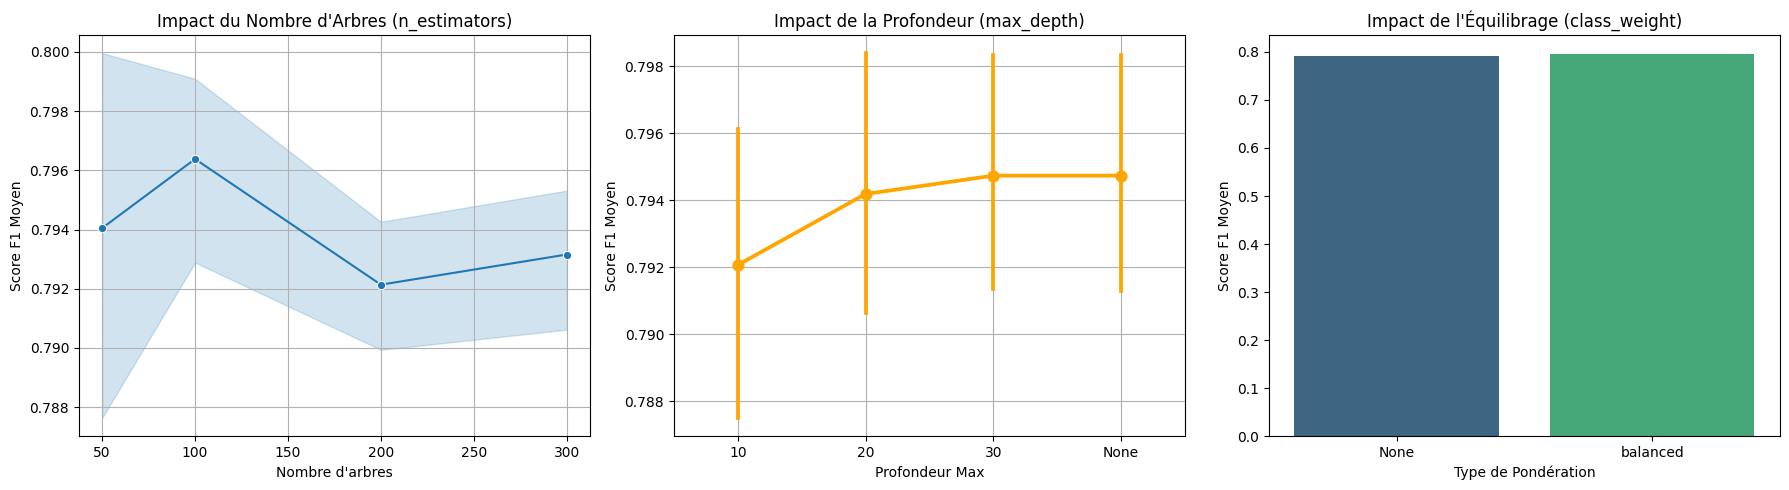

Meilleurs paramètres identifiés : {'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 50}


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. On récupère les résultats du GridSearch (supposant que grid_search.fit est déjà fini)
df_results = pd.DataFrame(grid_search.cv_results_)

# ==============================================================================
# CORRECTION DU BUG ICI
# ==============================================================================
# On convertit explicitement les colonnes en chaîne de caractères (str) 
# pour que Seaborn ne cherche pas à faire des maths avec "None".
df_results['param_max_depth'] = df_results['param_max_depth'].fillna('None').astype(str)
df_results['param_class_weight'] = df_results['param_class_weight'].fillna('None').astype(str)
# ==============================================================================

# 2. PLOTS DE COMPARAISON (Un par hyperparamètre)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- GRAPHIQUE 1 : Impact de n_estimators ---
# Celui-ci est purement numérique, pas de soucis
sns.lineplot(data=df_results, x='param_n_estimators', y='mean_test_score', marker='o', ax=axes[0])
axes[0].set_title("Impact du Nombre d'Arbres (n_estimators)")
axes[0].set_xlabel("Nombre d'arbres")
axes[0].set_ylabel("Score F1 Moyen")
axes[0].grid(True)

# --- GRAPHIQUE 2 : Impact de max_depth (CORRIGÉ) ---
# Maintenant que c'est du texte, on utilise pointplot ou lineplot (pointplot gère mieux les catégories)
sns.pointplot(data=df_results, x='param_max_depth', y='mean_test_score', ax=axes[1], color='orange')
axes[1].set_title("Impact de la Profondeur (max_depth)")
axes[1].set_xlabel("Profondeur Max")
axes[1].set_ylabel("Score F1 Moyen")
axes[1].grid(True)

# --- GRAPHIQUE 3 : Impact de class_weight (CORRIGÉ) ---
sns.barplot(data=df_results, x='param_class_weight', y='mean_test_score', ax=axes[2], ci=None, palette='viridis')
axes[2].set_title("Impact de l'Équilibrage (class_weight)")
axes[2].set_xlabel("Type de Pondération")
axes[2].set_ylabel("Score F1 Moyen")

plt.tight_layout()
plt.show()

# 3. Récapitulatif texte pour ton rapport
print(f"Meilleurs paramètres identifiés : {grid_search.best_params_}")

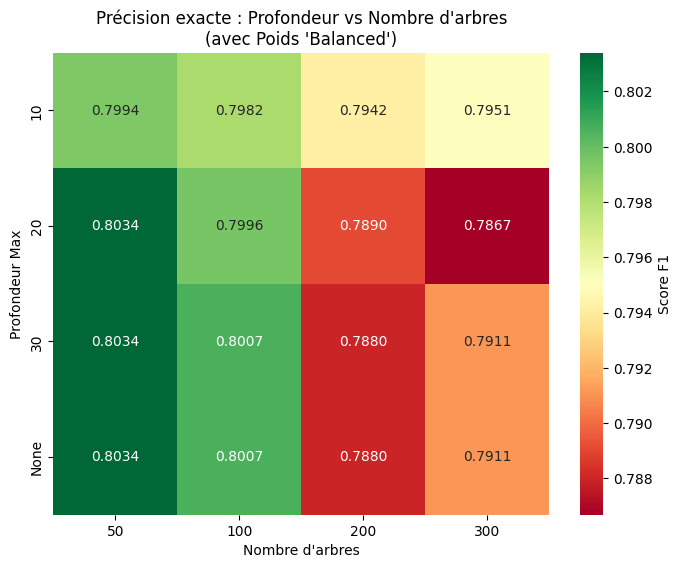

/tmp/ipykernel_35057/1599515663.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(data=top_3, x='label', y='mean_test_score', palette='viridis', ci=None)
/tmp/ipykernel_35057/1599515663.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_3, x='label', y='mean_test_score', palette='viridis', ci=None)


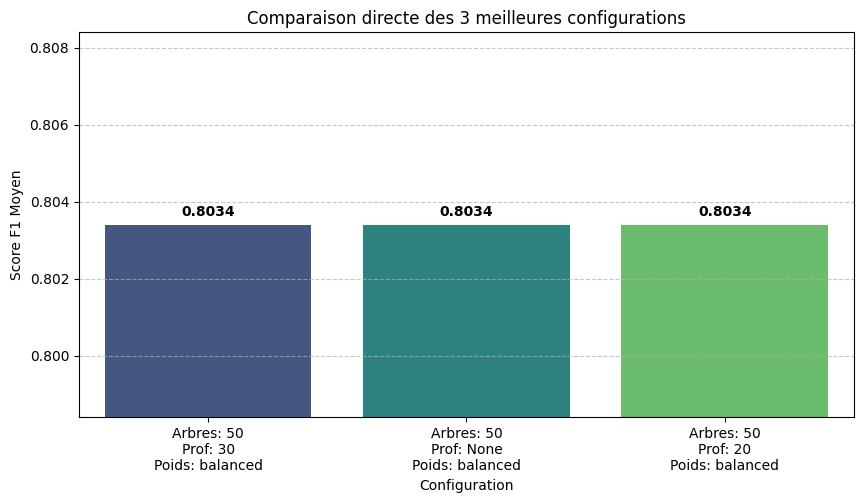

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Préparation des données (On reprend les résultats du GridSearch précédent)
# Si tu as relancé le notebook, assure-toi que 'grid_search' est bien exécuté avant.
results = pd.DataFrame(grid_search.cv_results_)

# Nettoyage pour l'affichage (remplacer None par le texte "None")
results['param_max_depth'] = results['param_max_depth'].fillna('None').astype(str)
results['param_class_weight'] = results['param_class_weight'].fillna('None').astype(str)

# ==============================================================================
# OPTION 1 : LA HEATMAP (Le graphique "écrit")
# ==============================================================================
# On fixe class_weight à 'balanced' car on sait que c'est mieux (vu avant)
# On compare donc précisément : n_estimators VS max_depth
subset = results[results['param_class_weight'] == 'balanced']

# Création de la matrice pour la heatmap
pivot_table = subset.pivot_table(
    values='mean_test_score', 
    index='param_max_depth', 
    columns='param_n_estimators'
)

plt.figure(figsize=(8, 6))
# annot=True écrit les chiffres dans les cases, fmt=".4f" donne 4 chiffres après la virgule
sns.heatmap(pivot_table, annot=True, cmap='RdYlGn', fmt=".4f", cbar_kws={'label': 'Score F1'})
plt.title("Précision exacte : Profondeur vs Nombre d'arbres\n(avec Poids 'Balanced')")
plt.ylabel("Profondeur Max")
plt.xlabel("Nombre d'arbres")
plt.show()


# ==============================================================================
# OPTION 2 : COMPARAISON DES 3 MEILLEURS MODÈLES (Le "Podium")
# ==============================================================================
# On trie pour trouver les 3 meilleurs scores
top_3 = results.sort_values(by='mean_test_score', ascending=False).head(3)

# On crée une étiquette lisible pour chaque modèle (ex: "Trees:100, Depth:30")
top_3['label'] = (
    "Arbres: " + top_3['param_n_estimators'].astype(str) + 
    "\nProf: " + top_3['param_max_depth'] + 
    "\nPoids: " + top_3['param_class_weight']
)

plt.figure(figsize=(10, 5))
# Barplot avec intervalle de confiance (barre noire) pour voir la stabilité
barplot = sns.barplot(data=top_3, x='label', y='mean_test_score', palette='viridis', ci=None)

# Ajout du texte exact au-dessus des barres
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.4f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontweight='bold')

plt.title("Comparaison directe des 3 meilleures configurations")
plt.xlabel("Configuration")
plt.ylabel("Score F1 Moyen")
plt.ylim(top_3['mean_test_score'].min() - 0.005, top_3['mean_test_score'].max() + 0.005) # Zoomer sur le haut
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()